<a href="https://colab.research.google.com/github/saichethanr/CodSoft/blob/main/Copy_of_credit_cardfraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CREDIT CARD FRAUD DETECTION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# importing the Data set

In [ ]:
ftrain=pd.read_csv('fraudTrain.csv')
ftest=pd.read_csv('fraudTest.csv')

In [ ]:
ftrain.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Checking the data imbalance

In [ ]:
fig = px.pie(values=ftrain['is_fraud'].value_counts(), names=["Genuine","Fraud"] , width=700, height=400, color_discrete_sequence=["red","blue"]
             ,title="Fraud vs Genuine transactions")
fig.show()

In [ ]:
ftrain.info(),ftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

(None, None)

In [ ]:
ftrain.isnull().sum(),ftest.isnull().sum()

(Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    0
 zip                      0
 lat                      0
 long                     0
 city_pop                 0
 job                      0
 dob                      0
 trans_num                0
 unix_time                0
 merch_lat                0
 merch_long               0
 is_fraud                 0
 dtype: int64,
 Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    0
 zip 

In [ ]:
print(ftrain.shape)
print(ftest.shape)

(1296675, 23)
(555719, 23)


# Dropping the unwanted colums

In [ ]:
drop_columns = ['Unnamed: 0','cc_num','merchant','trans_num','unix_time','first','last','street','zip']
ftrain.drop(columns=drop_columns,inplace=True)
ftest.drop(columns=drop_columns,inplace=True)

In [ ]:
ftrain.shape

(1296675, 14)

In [ ]:
ftest.shape

(555719, 14)

# handle date and time

In [ ]:
ftrain['trans_date_trans_time']=pd.to_datetime(ftrain['trans_date_trans_time'])
ftrain['trans_date']=ftrain['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
ftrain['trans_date']=pd.to_datetime(ftrain['trans_date'])
ftrain['dob']=pd.to_datetime(ftrain['dob'])

ftest['trans_date_trans_time']=pd.to_datetime(ftest['trans_date_trans_time'])
ftest['trans_date']=ftest['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
ftest['trans_date']=pd.to_datetime(ftest['trans_date'])
ftest['dob']=pd.to_datetime(ftest['dob'])

# Calculate age

In [ ]:
ftrain["age"] = ftrain["trans_date"]-ftrain["dob"]
ftrain["age"]=ftrain["age"].astype('timedelta64[Y]')

ftest["age"] = ftest["trans_date"]-ftest["dob"]
ftest["age"]=ftest["age"].astype('timedelta64[Y]')

# Transaction month and year

In [ ]:
ftrain['trans_month'] = pd.DatetimeIndex(ftrain['trans_date']).month
ftrain['trans_year'] = pd.DatetimeIndex(ftrain['trans_date']).year

# distance between merchant and home location

In [ ]:
ftrain['latitudinal_distance'] = abs(round(ftrain['merch_lat']-ftrain['lat'],3))
ftrain['longitudinal_distance'] = abs(round(ftrain['merch_long']-ftrain['long'],3))

ftest['latitudinal_distance'] = abs(round(ftest['merch_lat']-ftest['lat'],3))
ftest['longitudinal_distance'] = abs(round(ftest['merch_long']-ftest['long'],3))

#Droping the irrelevant columns Once again

In [ ]:
drop_columns = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','state','trans_date']
ftrain.drop(columns=drop_columns,inplace=True)
ftest.drop(columns=drop_columns,inplace=True)

# Converting the categorical data(gender)

In [ ]:
ftrain.gender=ftrain.gender.apply(lambda x: 1 if x=="M" else 0)
ftest.gender=ftest.gender.apply(lambda x: 1 if x=="M" else 0)

In [ ]:
ftrain.head()

,category,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance
0,misc_net,4.97,0,3495,0,30.0,1,2019,0.068,0.870
1,grocery_pos,107.23,0,149,0,40.0,1,2019,0.271,0.024
2,entertainment,220.11,1,4154,0,56.0,1,2019,0.970,0.108
3,gas_transport,45.00,1,1939,0,51.0,1,2019,0.804,0.447
4,misc_pos,41.96,1,99,0,32.0,1,2019,0.254,0.830


# One hot encoding on the categorical data

In [ ]:
ftrain= pd.get_dummies(ftrain, columns=['category'], prefix='category')
ftest = pd.get_dummies(ftest, columns=['category'], prefix='category')
ftest = ftest.reindex(columns=ftrain.columns, fill_value=0)

In [ ]:
ftrain.head()

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,category_entertainment,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,3495,0,30.0,1,2019,0.068,0.870,0,...,0,0,0,0,1,0,0,0,0,0
1,107.23,0,149,0,40.0,1,2019,0.271,0.024,0,...,1,0,0,0,0,0,0,0,0,0
2,220.11,1,4154,0,56.0,1,2019,0.970,0.108,1,...,0,0,0,0,0,0,0,0,0,0
3,45.00,1,1939,0,51.0,1,2019,0.804,0.447,0,...,0,0,0,0,0,0,0,0,0,0
4,41.96,1,99,0,32.0,1,2019,0.254,0.830,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
ftest.head()

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,category_entertainment,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,1,333497,0,52.0,0,0,0.020,0.265,0,...,0,0,0,0,0,0,1,0,0,0
1,29.84,0,302,0,30.0,0,0,0.870,0.476,0,...,0,0,0,0,0,0,1,0,0,0
2,41.28,0,34496,0,49.0,0,0,0.177,0.660,0,...,0,1,0,0,0,0,0,0,0,0
3,60.05,1,54767,0,32.0,0,0,0.243,0.064,0,...,0,0,0,0,0,1,0,0,0,0
4,3.19,1,1126,0,64.0,0,0,0.706,0.868,0,...,0,0,0,0,0,0,0,0,0,1


# Split the data into test and training set

In [ ]:
X_train = ftrain.drop('is_fraud', axis=1)
y_train = ftrain['is_fraud']
X_test = ftest.drop('is_fraud', axis=1)
y_test = ftest['is_fraud']

# Standardizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the Random forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

# Making the confusion matrix for random forest

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred1 = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred1)
print(cm)
accuracy_score(y_test, y_pred1)

[[553212    362]
 [   847   1298]]


0.9978244400497374

#Training the decition Tree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Making the confusion matrix for decition tree

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred3 = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred3)
print(cm)
accuracy_score(y_test, y_pred3)

[[551932   1642]
 [   811   1334]]


0.9955858986286235

# Visualising the accuracy of ( Random forest , logistic regression , Decition Tree model )

In [ ]:
final_data=pd.DataFrame({'Models':['RF','DT'],'ACC':[
                                                                            accuracy_score(y_test,y_pred1),



                                                                            accuracy_score(y_test,y_pred3)

                                                                            ]})

<Axes: xlabel='Models', ylabel='ACC'>

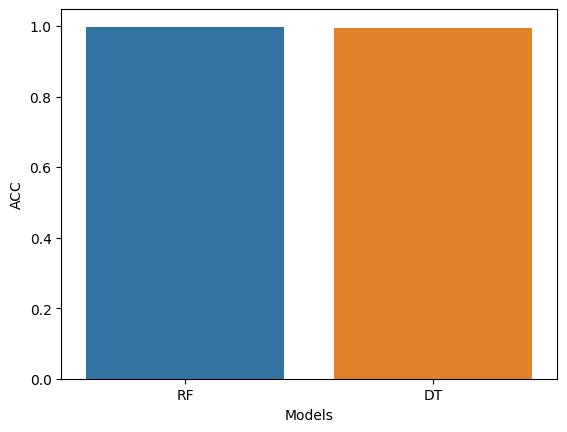

In [ ]:
sns.barplot(x=final_data.Models,y=final_data.ACC)